<a href="https://colab.research.google.com/github/Studwrestler/MLA_COH/blob/main/MLA5_COH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Chase Hall**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
landsat_target = pd.read_csv('/content/gdrive/MyDrive/CS 430/Feature Engineering/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS 430/Feature Engineering/landsat_test.csv')

### Statistical and Visual Exploration

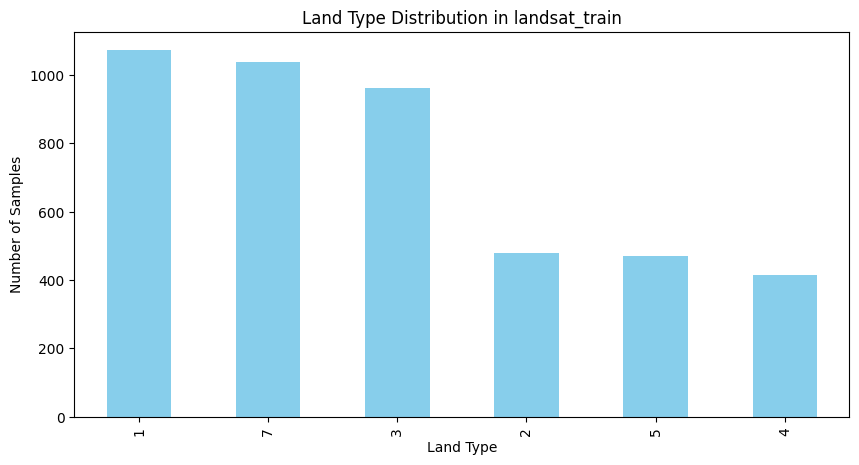

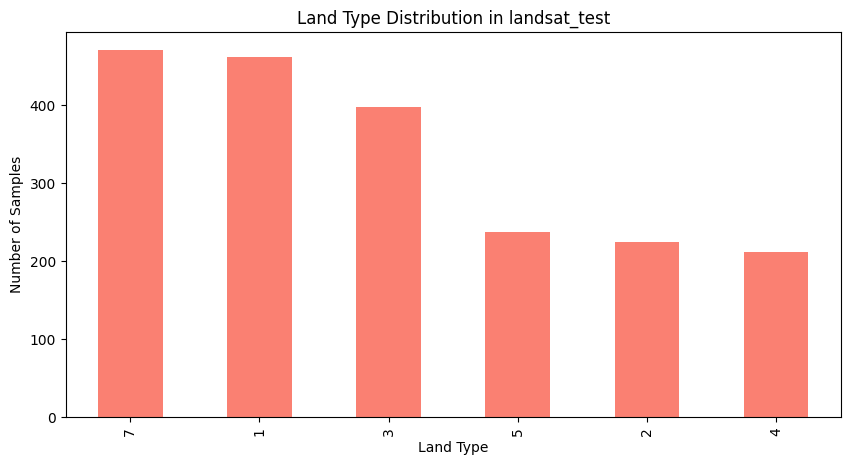

In [ ]:

plt.figure(figsize=(10, 5))
landsat_target['land_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Land Type Distribution in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Number of Samples')
plt.show()


plt.figure(figsize=(10, 5))
landsat_test['land_type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Land Type Distribution in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Number of Samples')
plt.show()

### Splitting Data into Train/Test

In [ ]:
X_train = landsat_target.drop('land_type', axis=1)
y_train = landsat_target['land_type']

X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test

### Building the Pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier

numerical_features = X_train.select_dtypes(include=['number']).columns

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')


pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])



### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

### Evaluating Model

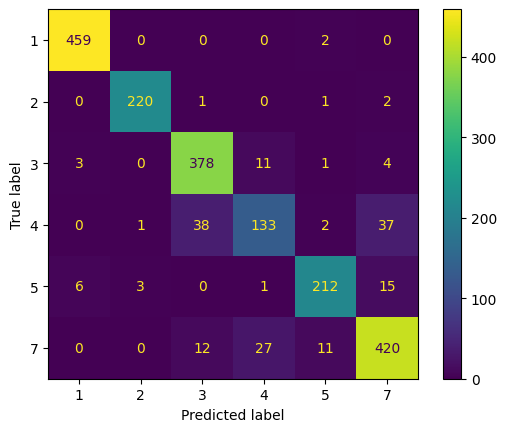

Precision: [0.98076923 0.98214286 0.88111888 0.77325581 0.92576419 0.87866109]
Recall: [0.99566161 0.98214286 0.95214106 0.63033175 0.89451477 0.89361702]
F1 Score: [0.98815931 0.98214286 0.91525424 0.69451697 0.90987124 0.88607595]


In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

def classification_function(y_test, y_pred):
  precision = precision_score(y_test, y_pred, average=None)
  recall = recall_score(y_test, y_pred, average=None)
  f1 = f1_score(y_test, y_pred, average=None)

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


cm = confusion_matrix(y_test['land_type'], y_pred)
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test['land_type'])
plt.show()

classification_function(y_test['land_type'], y_pred)


### Conclusion
This model predicts the type of land reasonably well but there are few that are incorrect. This model could be suitable but others should be tested before selectiong this one

## Problem 2

### Building the Pipeline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the individual classifiers for the ensemble
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier()
clf3 = SVC(probability=True)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')

# Create a new pipeline with the Voting Classifier
pipeline_voting = Pipeline([
    ('transformer', ct),
    ('classifier', voting_clf)
])




### Executing the Model

In [ ]:
pipeline_voting.fit(X_train, y_train)
y_pred_voting = pipeline_voting.predict(X_test)

### Evaluating Model

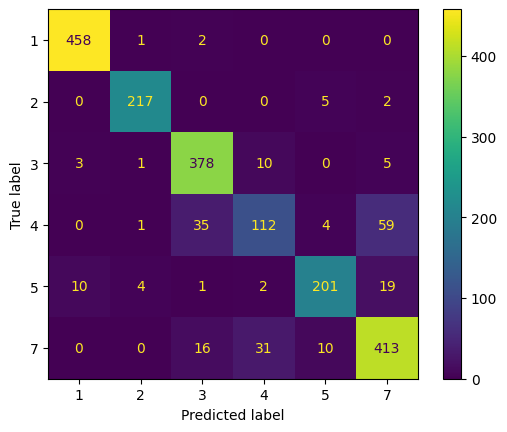

Precision: [0.97239915 0.96875    0.875      0.72258065 0.91363636 0.82931727]
Recall: [0.99349241 0.96875    0.95214106 0.53080569 0.84810127 0.8787234 ]
F1 Score: [0.98283262 0.96875    0.9119421  0.61202186 0.87964989 0.85330579]


In [ ]:
cm = confusion_matrix(y_test['land_type'], y_pred_voting)
ConfusionMatrixDisplay.from_estimator(pipeline_voting, X_test, y_test['land_type'])
plt.show()

classification_function(y_test['land_type'], y_pred_voting)

### Conclusion
This model is slightly worse than the model in problem one. Although this model still does a good job of prediction I would rather use the model in problem 1.

## Problem 3


### Read the Data

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/CS 430/Feature Engineering/banknote_authentication.csv')

##Split the Data

In [20]:
X = df.drop('forgery', axis=1)
y = df['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Build the Pipeline

In [21]:
pipeline=Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier())
])

##Execute the Model

In [25]:
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

###Evaluate the Model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



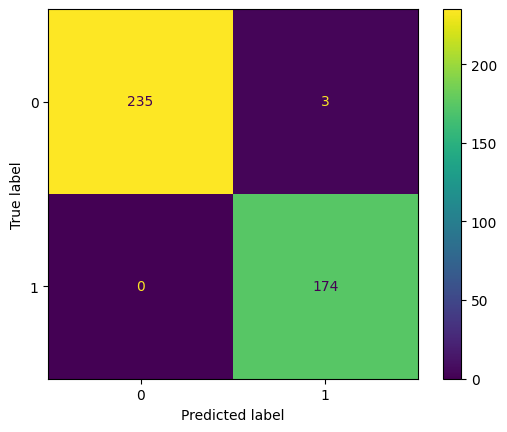

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

###Conclusion
This is model is almost 100% accutate and I would think that it is suitable for prediciting if the bank note is a forgery or not. Althought it has some failures all these failure occur as False negatives meaning the bank would not be accepting any false money even though it cant accpet some real money